This was the case study project from QUT. I corporated with other 2 students to finish this assignment. This is the part 1. Firstly, we need to clean the data and decide what feactures do we need for following mining, such as decision tree mining, regression mining, and neural network mining.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Data Preparation

## 1.1 Understand data
Firstly, read the data from csv file, then try to understand it.

In [3]:
#read the dataset
data = pd.read_csv('datasets/CaseStudyData.csv')

/Users/lexi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Use shape to see how many rows and columns in this data set
data.shape

(41476, 31)

In [7]:
# Use head() to show first 5 rows data.
data.head()

,PurchaseID,PurchaseTimestamp,PurchaseDate,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale,IsBadBuy
0,0,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,12505,0.941783287,?,?,NC,7800,0,920.0,Yes,0
1,1,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,10571,0.922618485,?,?,NC,7800,0,834.0,Yes,0
2,2,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9932,0.935159082,?,?,NC,7800,0,834.0,Yes,0
3,3,1253232000,18/09/2009 10:00,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,...,8739,0.931456688,?,?,NC,6000,0,671.0,Yes,0
4,4,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,...,9908,0.906943884,?,?,NC,7800,0,920.0,Yes,0


In [ ]:
# Use info to see the information of each column.
data.info()

## 1.2 Manipulate the data
Now, we need to clean the data.
* Clean the missing value
* Invalid values 
* Wrong type of data format

In [49]:
# There is no problem in VehYear, but it should be categorical.
data['VehYear'] = pd.Categorical(data['VehYear'])

### 1.2.1 Missing value in all columns

In [10]:
# find the missing data for all features
MissingData = data.isnull().sum()
print(MissingData.sort_values(ascending = False))

MMRCurrentRetailRatio                360
MMRAcquisitonRetailCleanPrice        149
WheelType                             96
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailAveragePrice          67
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRAcquisitionRetailAveragePrice      47
PRIMEUNIT                             44
AUCGUART                              44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WarrantyCost                          44
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
IsOnlineSale                          44
VehBCost                              44
VNST            

In [11]:
# there are 16 columns that are uniformly has missing data
# drop the missing values of subset columns total 44 instances
data = data.dropna(subset=['PRIMEUNIT', 'AUCGUART','VehYear','Make','Color','Transmission'\
                           ,'WheelTypeID','WarrantyCost','VehOdo','Nationality','Size',\
                           'TopThreeAmericanName','IsOnlineSale','VehBCost','VNST','Auction'])

In [13]:
MissingData = data.isnull().sum()
print(MissingData.sort_values(ascending = False))

MMRCurrentRetailRatio                316
MMRAcquisitonRetailCleanPrice        105
WheelType                             52
MMRCurrentRetailAveragePrice          23
MMRCurrentRetailCleanPrice            23
MMRAcquisitionAuctionAveragePrice     16
MMRCurrentAuctionCleanPrice            3
MMRCurrentAuctionAveragePrice          3
MMRAcquisitionRetailAveragePrice       3
MMRAcquisitionAuctionCleanPrice        3
VehYear                                0
Make                                   0
Color                                  0
Auction                                0
VehOdo                                 0
PurchaseDate                           0
PurchaseTimestamp                      0
Transmission                           0
WheelTypeID                            0
IsBadBuy                               0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
ForSale                                0
PRIMEUNIT       

### 1.2.2 Invalid value in column 'Color'

In [14]:
# Color contains ? and NOT AVAIL
data['Color'].unique()

array(['RED', 'SILVER', 'WHITE', 'BLUE', 'BEIGE', 'BLACK', 'GREEN',
       'GREY', 'NOT AVAIL', 'GOLD', 'PURPLE', 'ORANGE', 'MAROON',
       'YELLOW', 'OTHER', 'BROWN', '?'], dtype=object)

In [16]:
# Calculate which color has the higest percentage in two classes.
print(data['Color'].value_counts())
print("\n\nNormalised count (percentage) of Color with kick value prediction")
print(data.groupby(['IsBadBuy'])['Color'].value_counts(normalize=True))

SILVER       8541
WHITE        6890
BLUE         5855
BLACK        4392
GREY         4248
RED          3661
GOLD         3059
GREEN        1796
MAROON       1039
BEIGE         894
ORANGE        255
BROWN         249
PURPLE        205
YELLOW        141
OTHER         136
NOT AVAIL      65
?               6
Name: Color, dtype: int64


Normalised count (percentage) of Color with kick value prediction
IsBadBuy  Color    
0         SILVER       0.205479
          WHITE        0.166607
          BLUE         0.142318
          BLACK        0.107827
          GREY         0.103446
          RED          0.087864
          GOLD         0.072144
          GREEN        0.042865
          MAROON       0.025148
          BEIGE        0.021405
          ORANGE       0.006377
          BROWN        0.005822
          PURPLE       0.004686
          OTHER        0.003327
          YELLOW       0.003299
          NOT AVAIL    0.001248
          ?            0.000139
1         SILVER       0.210624
    

In [18]:
# Replace '?', 'NOT AVAIL' into 'SILVER'
data['Color'] = data['Color'].replace('?', 'SILVER')
data['Color'] = data['Color'].replace('NOT AVAIL', 'SILVER')
print(data['Color'].unique())

['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'GOLD'
 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN']


     Color  IsBadBuy  count
0    BEIGE         0    772
1    BEIGE         1    122
2    BLACK         0   3889
3    BLACK         1    503
4     BLUE         0   5133
5     BLUE         1    722
6    BROWN         0    210
7    BROWN         1     39
8     GOLD         0   2602
9     GOLD         1    457
10   GREEN         0   1546
11   GREEN         1    250
12    GREY         0   3731
13    GREY         1    517
14  MAROON         0    907
15  MAROON         1    132
16  ORANGE         0    230
17  ORANGE         1     25
18   OTHER         0    120
19   OTHER         1     16
20  PURPLE         0    169
21  PURPLE         1     36
22     RED         0   3169
23     RED         1    492
24  SILVER         0   7461
25  SILVER         1   1151
26   WHITE         0   6009
27   WHITE         1    881
28  YELLOW         0    119
29  YELLOW         1     22


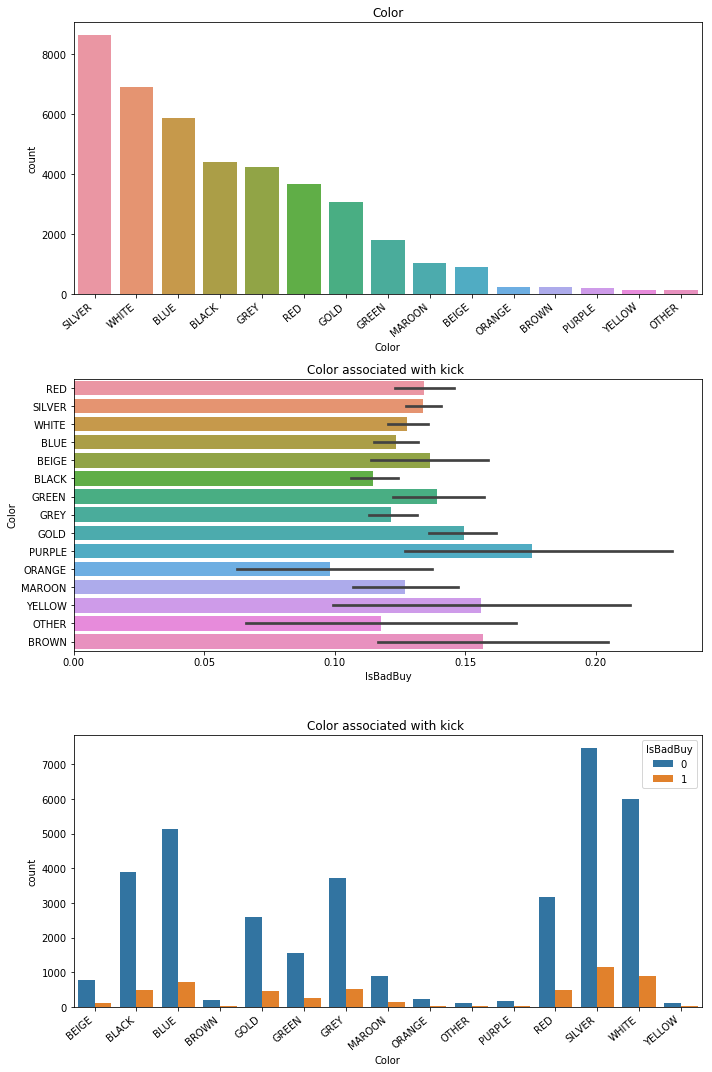

In [32]:
# Show some figures for Color
Color_IsBadBuy = pd.DataFrame({'count': data.groupby(['Color', 'IsBadBuy']).size()}).reset_index()
print(Color_IsBadBuy)

plt.figure(figsize=(10,15))

#Count plot
plt.subplot(3,1,1)
Color_Countplot = sns.countplot(data=data, x='Color', order=data['Color'].value_counts().index)
Color_Countplot.set_xticklabels(Color_Countplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color")

# Bar plot
plt.subplot(3,1,2)
Color_barplot = sns.barplot(data=data, y='Color', x='IsBadBuy')
plt.title("Color associated with kick ")

#Bar plot after group by
plt.subplot(3,1,3)
Color_IsBadBuy_plot = sns.barplot(data=Color_IsBadBuy, x='Color', y='count', hue='IsBadBuy')
Color_IsBadBuy_plot.set_xticklabels(Color_IsBadBuy_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color associated with kick ")

plt.tight_layout()

### 1.2.3 Invalid value in column 'Transmission'

In [34]:
# Transmission contains ? and both capital case and lower case Manual...
print(data['Transmission'].unique())

['AUTO' 'MANUAL' 'Manual' '?']


In [37]:
#Replace Manual => MANUAL
#Replace by majority since data is categorical
#Replace ? => AUTO
data['Transmission'] = data['Transmission'].replace('?', 'AUTO')
data['Transmission'] = data['Transmission'].replace('Manual', 'MANUAL')
print(data['Transmission'].unique())

['AUTO' 'MANUAL']


In [39]:
print(data['Transmission'].value_counts())
print("\n\nNormalised count (percentage) of Transmission with kick value prediction")
print(data.groupby(['IsBadBuy'])['Transmission'].value_counts(normalize=True))

AUTO      39936
MANUAL     1496
Name: Transmission, dtype: int64


Normalised count (percentage) of Transmission with kick value prediction
IsBadBuy  Transmission
0         AUTO            0.963512
          MANUAL          0.036488
1         AUTO            0.966449
          MANUAL          0.033551
Name: Transmission, dtype: float64


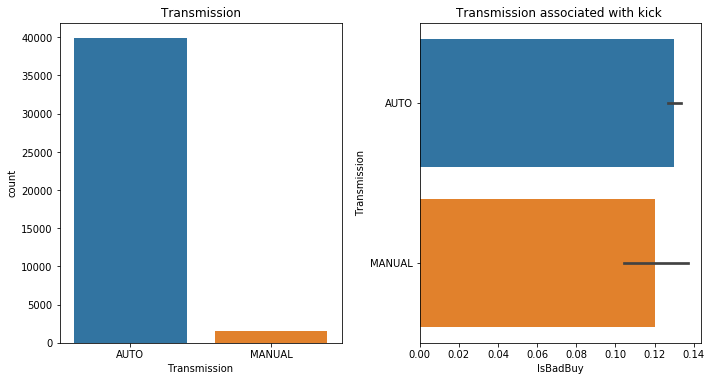

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=data, x='Transmission',)
plt.title("Transmission")

plt.subplot(222)
dg = sns.barplot(data=data, y='Transmission', x='IsBadBuy', )
plt.title("Transmission associated with kick ")
plt.tight_layout()

### 1.2.4 Invalid value in column 'WheeltypeId'

In [42]:
# WheelTypeID contains ?.
print(data['WheelTypeID'].unique())

['2' '1' '?' '3' '0']


In [44]:
#Replace by majority since data is categorical
data['WheelTypeID'] = data['WheelTypeID'].replace('?', '1')
data['WheelTypeID'] = pd.Categorical(data['WheelTypeID'])
print(data['WheelTypeID'].unique())

[2, 1, 3, 0]
Categories (4, object): [2, 1, 3, 0]


In [45]:
print(data['WheelTypeID'].value_counts())
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(data.groupby(['IsBadBuy'])['WheelTypeID'].value_counts(normalize=True))

1    22201
2    18791
3      437
0        3
Name: WheelTypeID, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelTypeID
0         1              0.511770
          2              0.477667
          3              0.010508
          0              0.000055
1         1              0.697670
          2              0.291333
          3              0.010811
          0              0.000186
Name: WheelTypeID, dtype: float64


  WheelTypeID  IsBadBuy  count
0           0         0      2
1           0         1      1
2           1         0  18458
3           1         1   3743
4           2         0  17228
5           2         1   1563
6           3         0    379
7           3         1     58


Text(0.5, 1.0, 'WheelTypeID associated with kick ')

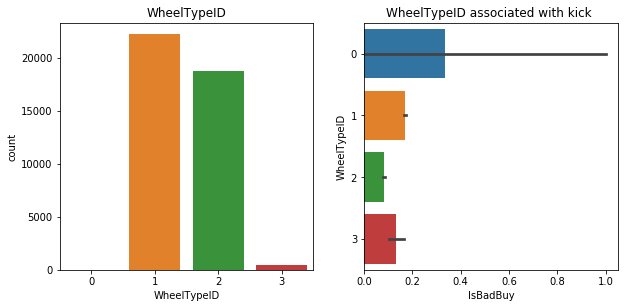

In [47]:
# Group by WheelTypeId and IsBadBuy
WheelTypeID_IsBadBuy = pd.DataFrame({'count': data.groupby(['WheelTypeID', 'IsBadBuy']).size()}).reset_index()
print(WheelTypeID_IsBadBuy)

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=data, x='WheelTypeID')
plt.title("WheelTypeID")

plt.subplot(222)
dg = sns.barplot(data=data, y='WheelTypeID', x='IsBadBuy', )
plt.title("WheelTypeID associated with kick ")

### 1.2.5 Invalid value in 'WheelType'

In [50]:
# WheelType contains ? and nan.
print(data['WheelType'].unique())

['Covers' 'Alloy' '?' 'Special' nan]


In [53]:
# replace nan and ? into Alloy
data['WheelType'] = data['WheelType'].replace(np.nan, 'Alloy')
data['WheelType'] = data['WheelType'].replace('?', 'Alloy')

In [55]:
print(data['WheelType'].value_counts())
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(data.groupby(['IsBadBuy'])['WheelType'].value_counts(normalize=True))

Alloy      22235
Covers     18761
Special      436
Name: WheelType, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelType
0         Alloy        0.512518
          Covers       0.477001
          Special      0.010480
1         Alloy        0.698975
          Covers       0.290214
          Special      0.010811
Name: WheelType, dtype: float64


Text(0.5, 1.0, 'WheelType associated with kick ')

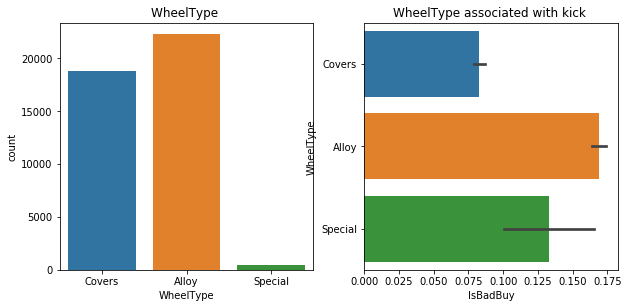

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=data, x='WheelType')
plt.title("WheelType ")

plt.subplot(222)
dg = sns.barplot(data=data, y='WheelType', x='IsBadBuy', )
plt.title("WheelType associated with kick ")

### 1.2.6 Invalid value in 'Nationality'

In [58]:
# Nationality contains ?.
print(data['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'USA' 'TOP LINE ASIAN' 'OTHER' '?']


In [59]:
# replace '?' and 'USA' to 'AMERICAN'
data['Nationality'] = data['Nationality'].replace('?', 'AMERICAN')
data['Nationality'] = data['Nationality'].replace('USA', 'AMERICAN')
print(data['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'TOP LINE ASIAN' 'OTHER']


In [60]:
print(data['Nationality'].value_counts())
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(data.groupby(['IsBadBuy'])['Nationality'].value_counts(normalize=True))

AMERICAN          34744
OTHER ASIAN        4474
TOP LINE ASIAN     2110
OTHER               104
Name: Nationality, dtype: int64


Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Nationality   
0         AMERICAN          0.840408
          OTHER ASIAN       0.106857
          TOP LINE ASIAN    0.050406
          OTHER             0.002329
1         AMERICAN          0.826281
          OTHER ASIAN       0.115564
          TOP LINE ASIAN    0.054427
          OTHER             0.003728
Name: Nationality, dtype: float64


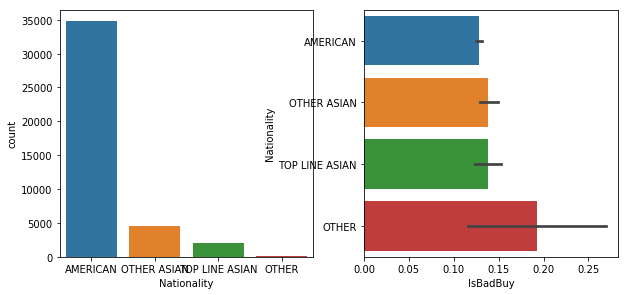

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=data, x='Nationality')

plt.subplot(222)
dg = sns.barplot(data=data, y='Nationality', x='IsBadBuy')

### 1.2.7 Invalid value in 'Size'

In [62]:
# Size contains ?.
print(data['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS' '?']


In [63]:
# replace '?' and 'USA' with 'AMERICAN'
data['Size'] = data['Size'].replace('?', 'MEDIUM')
print(data['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS']


In [64]:
print(data['Size'].value_counts())
print("\n\nNormalised count (percentage) of size with kick value prediction")
print(data.groupby(['IsBadBuy'])['Size'].value_counts(normalize=True))

MEDIUM         17543
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
Name: Size, dtype: int64


Normalised count (percentage) of size with kick value prediction
IsBadBuy  Size       
0         MEDIUM         0.427233
          LARGE          0.125405
          MEDIUM SUV     0.106552
          COMPACT        0.093132
          VAN            0.081044
          LARGE TRUCK    0.046081
          SMALL SUV      0.031636
          SPECIALTY      0.024870
          CROSSOVER      0.023845
          LARGE SUV      0.018965
          SMALL TRUCK    0.011617
          SPORTS         0.009621
1         MEDIUM         0.397763
          MEDIUM SUV     0.135322
          COMPACT        0.126002
          LARGE          0.082945
          VAN            0.082759
          LARGE TRUCK    0.043802
          SMALL SUV   

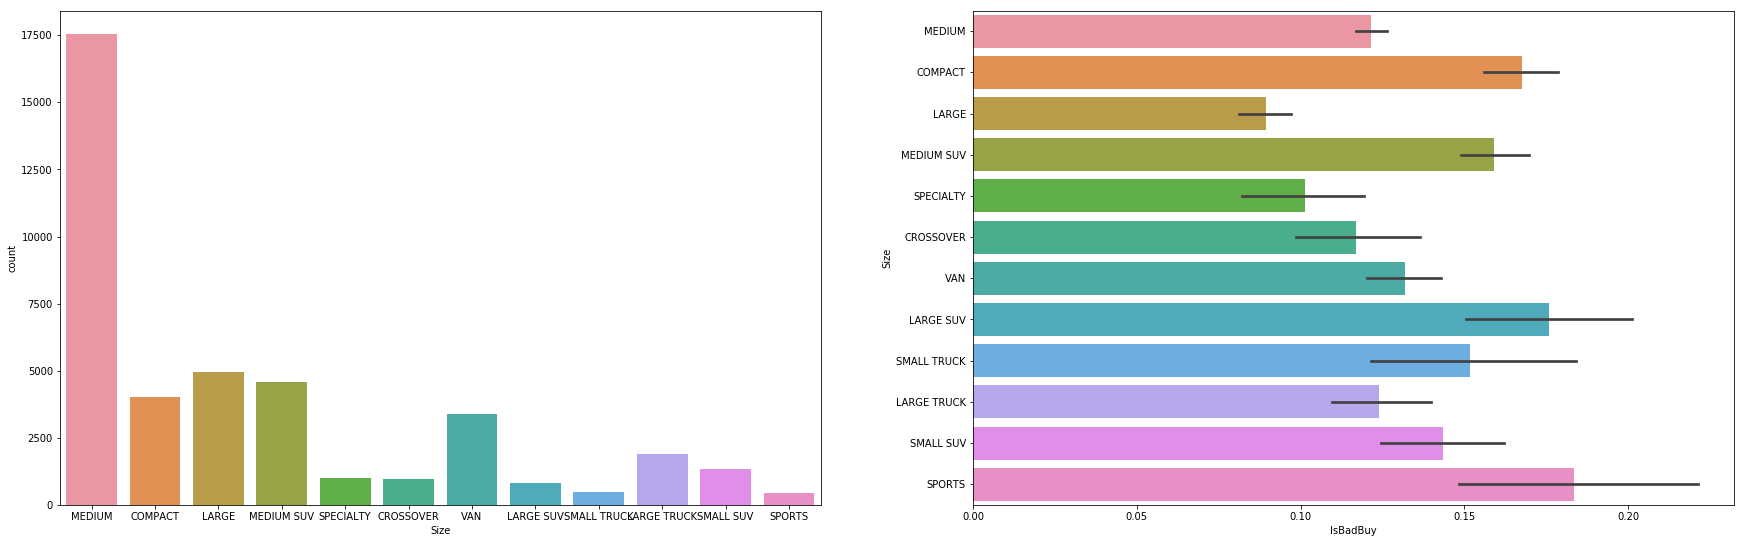

In [72]:
plt.figure(figsize=(30,20))
plt.subplot(221)
dg = sns.countplot(data=data, x='Size', )
plt.subplot(222)
dg = sns.barplot(data=data, y='Size', x='IsBadBuy', )

### 1.2.8 Invalid value in 'TopThreeAmericanName'

In [73]:
print(data['TopThreeAmericanName'].unique())
print(data['TopThreeAmericanName'].value_counts())

['CHRYSLER' 'GM' 'OTHER' 'FORD' '?']
GM          14075
CHRYSLER    13627
FORD         7039
OTHER        6688
?               3
Name: TopThreeAmericanName, dtype: int64


In [74]:
# replace '?' with 'GM'
data['TopThreeAmericanName'] = data['TopThreeAmericanName'].replace('?', 'GM')
print(data['TopThreeAmericanName'].unique())

['CHRYSLER' 'GM' 'OTHER' 'FORD']


In [75]:
print(data['TopThreeAmericanName'].value_counts())
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(data.groupby(['IsBadBuy'])['TopThreeAmericanName'].value_counts(normalize=True))

GM          14078
CHRYSLER    13627
FORD         7039
OTHER        6688
Name: TopThreeAmericanName, dtype: int64


Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  TopThreeAmericanName
0         GM                      0.346938
          CHRYSLER                0.331356
          FORD                    0.162115
          OTHER                   0.159592
1         CHRYSLER                0.312395
          GM                      0.291705
          FORD                    0.222181
          OTHER                   0.173719
Name: TopThreeAmericanName, dtype: float64


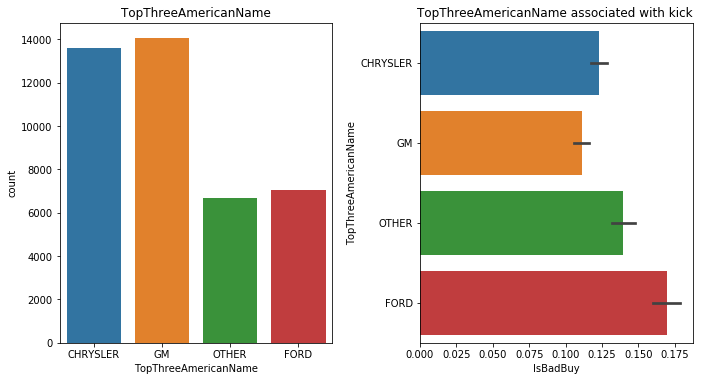

In [76]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=data, x='TopThreeAmericanName',)
plt.title("TopThreeAmericanName")

plt.subplot(222)
dg = sns.barplot(data=data, y='TopThreeAmericanName', x='IsBadBuy', )
plt.title("TopThreeAmericanName associated with kick ")
plt.tight_layout()

### 1.2.9 Invalid values in several columns for price

In [78]:
# replace '?' with '0'
data['MMRAcquisitionAuctionAveragePrice'] = data['MMRAcquisitionAuctionAveragePrice'].replace('?', '0')
# convert data type from string to numeric
data['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(data['MMRAcquisitionAuctionAveragePrice'])
data['MMRAcquisitionAuctionAveragePrice'].unique()
# fill the missing value with the mean of the column
data['MMRAcquisitionAuctionAveragePrice'] = data['MMRAcquisitionAuctionAveragePrice'].fillna((data['MMRAcquisitionAuctionAveragePrice'].mean()))
print(data['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())

0


In [79]:
# replace '?' with '0'
data['MMRAcquisitionAuctionCleanPrice'] = data['MMRAcquisitionAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRAcquisitionAuctionCleanPrice'] = pd.to_numeric(data['MMRAcquisitionAuctionCleanPrice'])
data['MMRAcquisitionAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
data['MMRAcquisitionAuctionCleanPrice'] = data['MMRAcquisitionAuctionCleanPrice'].fillna((data['MMRAcquisitionAuctionCleanPrice'].mean()))
print(data['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())

0


In [80]:
# replace '?' with '0'
data['MMRAcquisitionRetailAveragePrice'] = data['MMRAcquisitionRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRAcquisitionRetailAveragePrice'] = pd.to_numeric(data['MMRAcquisitionRetailAveragePrice'])
data['MMRAcquisitionRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
data['MMRAcquisitionRetailAveragePrice'] = data['MMRAcquisitionRetailAveragePrice'].fillna((data['MMRAcquisitionRetailAveragePrice'].mean()))
print(data['MMRAcquisitionRetailAveragePrice'].isnull().values.sum())

0


In [81]:
# replace '?' with '0'
data['MMRAcquisitonRetailCleanPrice'] = data['MMRAcquisitonRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRAcquisitonRetailCleanPrice'] = pd.to_numeric(data['MMRAcquisitonRetailCleanPrice'])
data['MMRAcquisitonRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
data['MMRAcquisitonRetailCleanPrice'] = data['MMRAcquisitonRetailCleanPrice'].fillna((data['MMRAcquisitonRetailCleanPrice'].mean()))
print(data['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())

0


In [83]:
# replace '?' with '0'
data['MMRCurrentAuctionAveragePrice'] = data['MMRCurrentAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRCurrentAuctionAveragePrice'] = pd.to_numeric(data['MMRCurrentAuctionAveragePrice'])
data['MMRCurrentAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
data['MMRCurrentAuctionAveragePrice'] = data['MMRCurrentAuctionAveragePrice'].fillna((data['MMRCurrentAuctionAveragePrice'].mean()))
print(data['MMRCurrentAuctionAveragePrice'].isnull().values.sum())

0


In [85]:
data['MMRCurrentAuctionCleanPrice'] = data['MMRCurrentAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRCurrentAuctionCleanPrice'] = pd.to_numeric(data['MMRCurrentAuctionCleanPrice'])
data['MMRCurrentAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
data['MMRCurrentAuctionCleanPrice'] = data['MMRCurrentAuctionCleanPrice'].fillna((data['MMRCurrentAuctionCleanPrice'].mean()))
print(data['MMRCurrentAuctionCleanPrice'].isnull().values.sum())

0


In [86]:
# replace '?' with '0'
data['MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRCurrentRetailAveragePrice'] = pd.to_numeric(data['MMRCurrentRetailAveragePrice'])
data['MMRCurrentRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
data['MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].fillna((data['MMRCurrentRetailAveragePrice'].mean()))
print(data['MMRCurrentRetailAveragePrice'].isnull().values.sum())

0


In [88]:
# replace '?' with '0'
data['MMRCurrentRetailCleanPrice'] = data['MMRCurrentRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
data['MMRCurrentRetailCleanPrice'] = pd.to_numeric(data['MMRCurrentRetailCleanPrice'])
data['MMRCurrentRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
data['MMRCurrentRetailCleanPrice'] = data['MMRCurrentRetailCleanPrice'].fillna((data['MMRCurrentRetailCleanPrice'].mean()))
print(data['MMRCurrentRetailCleanPrice'].isnull().values.sum())

0


In [89]:
# replace '?' with '0'
data['MMRCurrentRetailRatio'] = data['MMRCurrentRetailRatio'].replace('#VALUE!', '0')

# convert data type from string to numeric
data['MMRCurrentRetailRatio'] = pd.to_numeric(data['MMRCurrentRetailRatio'])
data['MMRCurrentRetailRatio'].unique()

# fill the missing value with the mean of the column
data['MMRCurrentRetailRatio'] = data['MMRCurrentRetailRatio'].fillna((data['MMRCurrentRetailRatio'].mean()))
print (data['MMRCurrentRetailRatio'].isnull().values.sum())

0


### 1.2.10 Invalid values in 'VehBCost'

In [90]:
data['VehBCost'].unique()

array(['7800', '6000', '7500', ..., '10885', '11945', '3205'],
      dtype=object)

In [92]:
# replace '?' with '0'
data['VehBCost'] = data['VehBCost'].replace('?', '0')
# convert data type from string to numeric
data['VehBCost'] = pd.to_numeric(data['VehBCost'])
data['VehBCost'].unique()

array([ 7800,  6000,  7500, ..., 10885, 11945,  3205])

Text(0.5, 1.0, 'Purchase cost that is KICK')

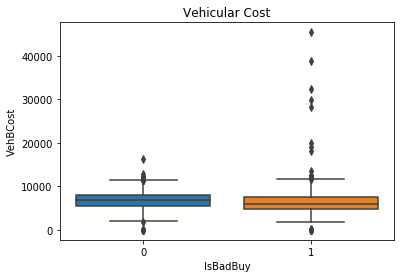

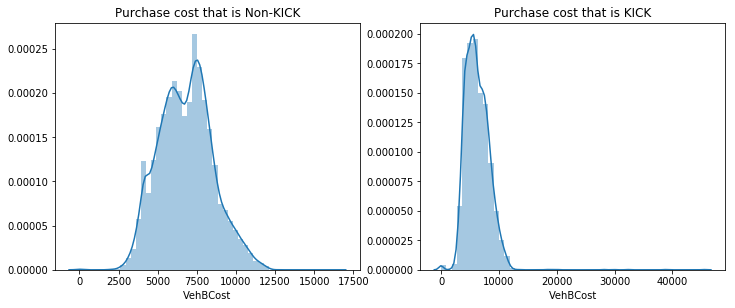

In [93]:
dg = sns.boxplot( x ='IsBadBuy', y ='VehBCost', data=data).set_title('Vehicular Cost')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['IsBadBuy']==0].VehBCost)
plt.title('Purchase cost that is Non-KICK')

plt.subplot(222)
sns.distplot(data[data['IsBadBuy']==1].VehBCost)
plt.title('Purchase cost that is KICK')

### 1.2.11 Invalid values in 'IsOnlineSale'

In [94]:
print(data['IsOnlineSale'].unique())
print(data['IsOnlineSale'].value_counts())

[0.0 -1.0 2.0 4.0 1.0 '0' '1' '?']
0.0     31368
0        8572
1.0       753
-1.0      601
1         134
?           2
4.0         1
2.0         1
Name: IsOnlineSale, dtype: int64


In [95]:
# replace '?' with '0'
data['IsOnlineSale'] = data['IsOnlineSale'].replace( '0.0', 0)
data['IsOnlineSale'] = data['IsOnlineSale'].replace('?', 0)
data['IsOnlineSale'] = data['IsOnlineSale'].replace(-1.0, 1)
data['IsOnlineSale'] = data['IsOnlineSale'].replace( 2.0, 0)
data['IsOnlineSale'] = data['IsOnlineSale'].replace( 4.0, 0)
data['IsOnlineSale'] = data['IsOnlineSale'].replace( '0', 0)
data['IsOnlineSale'] = data['IsOnlineSale'].replace( '1', 1)
data['IsOnlineSale'] = data['IsOnlineSale'].replace( 0.0, '0')
data['IsOnlineSale'] = data['IsOnlineSale'].replace( 1.0, '1')
print(data['IsOnlineSale'].value_counts())

0    39944
1     1488
Name: IsOnlineSale, dtype: int64


In [98]:
# convert data type from string to Categorical
data['IsOnlineSale'] = pd.Categorical(data['IsOnlineSale'])
print(data['IsOnlineSale'].unique())
print(data['IsOnlineSale'].value_counts())

[0, 1]
Categories (2, object): [0, 1]
0    39944
1     1488
Name: IsOnlineSale, dtype: int64


In [100]:
print("\n\nNormalised count (percentage) of IsOnlineSale with kick value prediction")
print(data.groupby(['IsBadBuy'])['IsOnlineSale'].value_counts(normalize=True))



Normalised count (percentage) of IsOnlineSale with kick value prediction
IsBadBuy  IsOnlineSale
0         0               0.963734
          1               0.036266
1         0               0.966449
          1               0.033551
Name: IsOnlineSale, dtype: float64


Text(0.5, 1.0, 'IsOnlineSale associated with kick ')

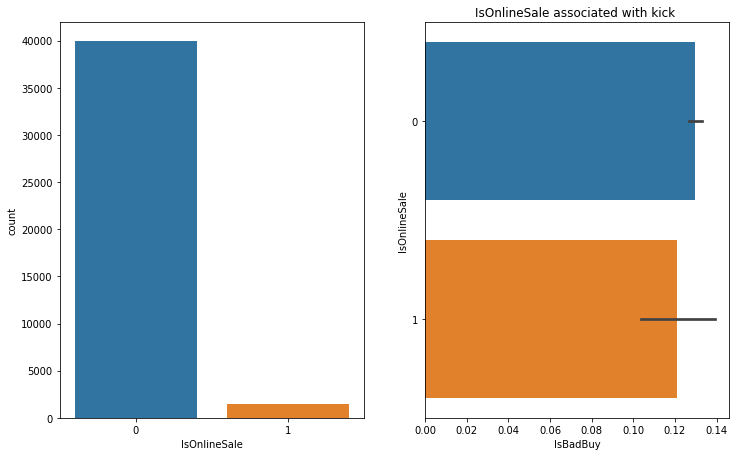

In [101]:
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=data, x='IsOnlineSale')

plt.subplot(222)
dg = sns.barplot(data=data, y='IsOnlineSale', x='IsBadBuy', )
plt.title("IsOnlineSale associated with kick ")

### 1.2.12 Invalid values in 'ForSale'

In [102]:
print(data['ForSale'].unique())
print(data['ForSale'].value_counts())

['Yes' 'No' '?' 'yes' '0' 'YES']
Yes    27358
YES     8544
yes     5524
?          3
No         2
0          1
Name: ForSale, dtype: int64


In [103]:
# replace noisy
data['ForSale'] = data['ForSale'].replace('yes', 'Yes')
data['ForSale'] = data['ForSale'].replace('YES', 'Yes')
data['ForSale'] = data['ForSale'].replace('?', 'Yes')
data['ForSale'] = data['ForSale'].replace('0', 'No')
print(data['ForSale'].unique())
print(data['ForSale'].value_counts())

['Yes' 'No']
Yes    41429
No         3
Name: ForSale, dtype: int64


In [104]:
print("\n\nNormalised count (percentage) of ForSale with kick value prediction")
print(data.groupby(['IsBadBuy'])['ForSale'].value_counts(normalize=True))



Normalised count (percentage) of ForSale with kick value prediction
IsBadBuy  ForSale
0         Yes        0.999917
          No         0.000083
1         Yes        1.000000
Name: ForSale, dtype: float64


Text(0.5, 1.0, 'ForSale associated with kick ')

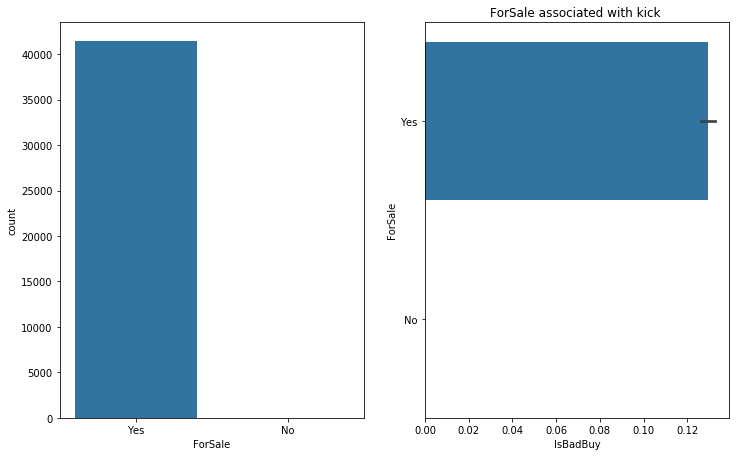

In [105]:
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=data, x='ForSale')

plt.subplot(222)
dg = sns.barplot(data=data, y='ForSale', x='IsBadBuy', )
plt.title("ForSale associated with kick ")

## 1.3 Select features for further mining

In [106]:
# Setting up the dataFrame for Machine learning 
# exclude some columns(dropcol) unncessary for training
dropcol = (['PurchaseID','PurchaseTimestamp', 'PurchaseDate' ,'WheelTypeID', 'PRIMEUNIT', \
            'AUCGUART', 'IsOnlineSale', 'ForSale'])
data = data.drop(dropcol,  axis = 1)

In [107]:
# correcting nominal variable for 'Transmission' to encode as binary
trans_map = {'AUTO':0, 'MANUAL':1}
data['Transmission'] = data['Transmission'].map(trans_map)

In [110]:
df_col = data

In [112]:
# Correcting categorical variable by using one hot encoding
data = pd.concat([data,pd.get_dummies(data['Auction'], prefix='Auction', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['VehYear'], prefix='VehYear', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['Make'], prefix='Make', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['Color'], prefix='Color', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['WheelType'], prefix='WheelType', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['Nationality'], prefix='Nationality', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['Size'], prefix='Size', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['TopThreeAmericanName'], prefix='TopThreeAmericanName', prefix_sep='_', columns= (''))], axis=1)
data = pd.concat([data,pd.get_dummies(data['VNST'], prefix='VNST', prefix_sep='_', columns= (''))], axis=1)

In [113]:
# drop the original columns after one hot encoding
data.drop(['Auction'],axis=1, inplace=True)
data.drop(['VehYear'],axis=1, inplace=True)
data.drop(['Make'],axis=1, inplace=True)
data.drop(['Color'],axis=1, inplace=True)
data.drop(['WheelType'],axis=1, inplace=True)
data.drop(['Nationality'],axis=1, inplace=True)
data.drop(['Size'],axis=1, inplace=True)
data.drop(['TopThreeAmericanName'],axis=1, inplace=True)
data.drop(['VNST'],axis=1, inplace=True)

In [ ]:
# random segmenting
df_0,df_1  = [x for _, x in df.groupby(df['IsBadBuy'] >0)]
df_0=df_0.iloc[:5365, :]
df=pd.concat([df_0, df_1])

# End
Finally, the data can be used for futher mining process.
For convenience, we collect all processes in this ipynb into a function and put into a .py file.

In [116]:
# inside dm_tools.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
#import pydot
from io import StringIO
from sklearn.tree import export_graphviz

def data_prep():
    df = pd.read_csv('CaseStudy1-data/CaseStudyData.csv')
    
    # find the missing data for all features
    MissingData = df.isnull().sum()

    # there are 16 columns that are uniformly has missing data
    # drop the missing values of subset columns total 44 instances
    
    df=df.dropna(subset=['PRIMEUNIT', 'AUCGUART','VehYear','Make','Color','Transmission','WheelTypeID','WarrantyCost',
               'VehOdo','Nationality','Size','TopThreeAmericanName','IsOnlineSale','VehBCost','VNST','Auction'])

    ## VehYear ##
    df['VehYear'] = pd.Categorical(df['VehYear'])
        
    ## COLOR ##
    # Replace '?' and 'NOT AVAIL' into 'OTHER'
    df['Color'] = df['Color'].replace('?', 'SILVER')
    df['Color'] = df['Color'].replace('NOT AVAIL', 'SILVER')
    
    ## TRANSMISSION ##
    #Replace ? => Auto
    #Replace Manual => MANUAL
    df['Transmission'] = df['Transmission'].replace('?', 'AUTO')
    df['Transmission'] = df['Transmission'].replace('Manual', 'MANUAL')
    ## correcting nominal variable for 'Transmission' to encode as binary
    trans_map = {'AUTO':0, 'MANUAL':1}
    df['Transmission'] = df['Transmission'].map(trans_map)
    
    
    ## WHEELTYPEID ##
    # replace by majority since data is categorical
    df['WheelTypeID'] = df['WheelTypeID'].replace('?', '1')
    df['WheelTypeID'] = pd.Categorical(df['WheelTypeID'])
    
    ## WHEEL TYPE ##
    # replace nan and ? into Alloy
    df['WheelType'] = df['WheelType'].replace(np.nan, 'Alloy')
    df['WheelType'] = df['WheelType'].replace('?', 'Alloy')
    
    ## NATIONALITY ##
    # replace '?' and 'USA' and 'OTHER' with 'AMERICAN'
    df['Nationality'] = df['Nationality'].replace('?', 'AMERICAN')
    df['Nationality'] = df['Nationality'].replace('USA', 'AMERICAN')    
    
    ## SIZE ##
    # replace '?' into Medium
    df['Size'] = df['Size'].replace('?', 'MEDIUM')
    
    ## TOPTHREEAMERICANNAME ##
    # replace '?' with 'GM'
    df['TopThreeAmericanName'] = df['TopThreeAmericanName'].replace('?', 'GM')
    
    ## MMRAcquisitionAuctionAveragePrice ##
    # replace '?' with '0'
    df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(df['MMRAcquisitionAuctionAveragePrice'])
    # fill the missing value with the mean of the column
    df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].fillna((df['MMRAcquisitionAuctionAveragePrice'].mean()))
    
    ## MMRAcquisitionAuctionCleanPrice ##
    # replace '?' with '0'
    df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRAcquisitionAuctionCleanPrice'] = pd.to_numeric(df['MMRAcquisitionAuctionCleanPrice'])
    # fill the missing value with the mean of the column
    df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].fillna((df['MMRAcquisitionAuctionCleanPrice'].mean()))
    
    ## MMRAcquisitionRetailAveragePrice ##
    # replace '?' with '0'
    df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRAcquisitionRetailAveragePrice'] = pd.to_numeric(df['MMRAcquisitionRetailAveragePrice'])
    # fill the missing value with the mean of the column
    df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].fillna((df['MMRAcquisitionRetailAveragePrice'].mean()))
    
    ## MMRAcquisitonRetailCleanPrice ##
    # replace '?' with '0'
    df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRAcquisitonRetailCleanPrice'] = pd.to_numeric(df['MMRAcquisitonRetailCleanPrice'])
    # fill the missing value with the mean of the column
    df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].fillna((df['MMRAcquisitonRetailCleanPrice'].mean()))
    
    ## MMRCurrentAuctionAveragePrice ##
    # replace '?' with '0'
    df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRCurrentAuctionAveragePrice'] = pd.to_numeric(df['MMRCurrentAuctionAveragePrice'])
    # fill the missing value with the mean of the column
    df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].fillna((df['MMRCurrentAuctionAveragePrice'].mean()))
    
    ## MMRCurrentAuctionCleanPrice ##
    # replace '?' with '0'
    df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRCurrentAuctionCleanPrice'] = pd.to_numeric(df['MMRCurrentAuctionCleanPrice'])
    # fill the missing value with the mean of the column
    df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].fillna((df['MMRCurrentAuctionCleanPrice'].mean()))
    
    ## MMRCurrentRetailAveragePrice ##
    # replace '?' with '0'
    df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRCurrentRetailAveragePrice'] = pd.to_numeric(df['MMRCurrentRetailAveragePrice'])
    # fill the missing value with the mean of the column
    df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].fillna((df['MMRCurrentRetailAveragePrice'].mean()))

    ## MMRCurrentRetailCleanPrice ##
    # replace '?' with '0'
    df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace('?', '0')
    # convert data type from string to numeric
    df['MMRCurrentRetailCleanPrice'] = pd.to_numeric(df['MMRCurrentRetailCleanPrice'])
    # fill the missing value with the mean of the column
    df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].fillna((df['MMRCurrentRetailCleanPrice'].mean()))
    
    ## MMRCurrentRetailRatio ##
    # replace '?' with '0'
    df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailRatio'].replace('#VALUE!', '0')
    # convert data type from string to numeric
    df['MMRCurrentRetailRatio'] = pd.to_numeric(df['MMRCurrentRetailRatio'])
    # fill the missing value with the mean of the column
    df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailRatio'].fillna((df['MMRCurrentRetailRatio'].mean()))

    ## VehBCost ##
    # replace '?' with '0'
    df['VehBCost'] = df['VehBCost'].replace('?', '0')
    # convert data type from string to numeric
    df['VehBCost'] = pd.to_numeric(df['VehBCost'])
    
    ## IsOnlineSale ##
    # replace '?' with '0'
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( '0.0', 0)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace('?', 0)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace(-1.0, 1)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( 2.0, 0)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( 4.0, 0)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( '0', 0)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( '1', 1)
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( 0.0, '0')
    df['IsOnlineSale'] = df['IsOnlineSale'].replace( 1.0, '1')

    ## IsOnlineSale ##
    # convert data type from string to numeric
    df['IsOnlineSale'] = pd.Categorical(df['IsOnlineSale'])
    
    ## ForSale ##
    # replace noisy
    df['ForSale'] = df['ForSale'].replace('yes', 'Yes')
    df['ForSale'] = df['ForSale'].replace('YES', 'Yes')
    df['ForSale'] = df['ForSale'].replace('?', 'Yes')
    df['ForSale'] = df['ForSale'].replace('0', 'No')
    
    # Setting up the dataFrame for Machine learning 
    # exclude some columns(dropcol) unncessary for training
    dropcol = (['PurchaseID','PurchaseTimestamp', 'PurchaseDate' ,'WheelTypeID', 'PRIMEUNIT', \
            'AUCGUART', 'IsOnlineSale', 'ForSale'])
    df= df.drop(dropcol,  axis = 1)
    #df1.head()
    
    
    # correcting nominal variable for 'Transmission' to encode as binary
    trans_map = {'AUTO':0, 'MANUAL':1}
    df['Transmission'] = df['Transmission'].map(trans_map)
    
    df_col = df
       
        
    # Correcting categorical variable by using one hot encoding
    df = pd.concat([df,pd.get_dummies(df['Auction'], prefix='Auction', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['VehYear'], prefix='VehYear', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['Make'], prefix='Make', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['Color'], prefix='Color', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['WheelType'], prefix='WheelType', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['Nationality'], prefix='Nationality', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['Size'], prefix='Size', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['TopThreeAmericanName'], prefix='TopThreeAmericanName', prefix_sep='_', columns= (''))], axis=1)
    df = pd.concat([df,pd.get_dummies(df['VNST'], prefix='VNST', prefix_sep='_', columns= (''))], axis=1)

    # drop the original columns after one hot encoding
    df.drop(['Auction'],axis=1, inplace=True)
    df.drop(['VehYear'],axis=1, inplace=True)
    df.drop(['Make'],axis=1, inplace=True)
    df.drop(['Color'],axis=1, inplace=True)
    df.drop(['WheelType'],axis=1, inplace=True)
    df.drop(['Nationality'],axis=1, inplace=True)
    df.drop(['Size'],axis=1, inplace=True)
    df.drop(['TopThreeAmericanName'],axis=1, inplace=True)
    df.drop(['VNST'],axis=1, inplace=True)
    
    
    # random segmenting
    
    df_0,df_1  = [x for _, x in df.groupby(df['IsBadBuy'] >0)]
    df_0=df_0.iloc[:5365, :]
    df=pd.concat([df_0, df_1])
    
       
    return df
